# Introduction


**In this code, I will write some code to process the data and prepare it to train the algorithms, in addition to some demo codes for the Random Forest algorithms in addition to XGBoost.
And also the interpretation of the results of the algorithm XGBoost.**

In [61]:
Agenda = {
    1:"Importing what I want from libraries",
    2:"Some Installations",
    3:"Loading our dataset",
    4:"Look at the data",
    5:"Fixing some problems in dataset",
    6:"Prepare data for training",
    7:"Random Forest Model",
    8:"XGBClassifier Model",
    9:"Interpretation of results using shape"
}

Agenda

{1: 'Importing what I want from libraries',
 2: 'Some Installations',
 3: 'Loading our dataset',
 4: 'Look at the data',
 5: 'Fixing some problems in dataset',
 6: 'Prepare data for training',
 7: 'Random Forest Model',
 8: 'XGBClassifier Model',
 9: 'Interpretation of results using shape'}

## 1.0 Importing what I want from libraries

In [2]:
# import some basic libs
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Ensure that the accuracy levels in the data are correct
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
 
# Avoid the appearance of internal processing messages
import warnings
warnings.filterwarnings('ignore')

# Adjust the dimensions of the resulting shapes
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)

## 2.0 Some Installations

In [3]:
pip install xlrd

     |████████████████████████████████| 96 kB 1.0 MB/s            
Note: you may need to restart the kernel to use updated packages.


## 3.0 Loading oue dataset

In [4]:
# by using try and except to handle errors
try:
    data=pd.read_excel('../input/data-data/BD sheet for ML_14Nov2021.xls')
    print("Correct.....Complete your work")
except:
    !pip install xlrd
    data=pd.read_excel('../input/data-data/BD sheet for ML_14Nov2021.xls')

Correct.....Complete your work


## 4.0 Look at the dataset

In [5]:
data.head()

,VisionThreat,ID,Age (years),Sex (Male/Female),Smoking status (never/current or ever),Diabetes metllitus (Y/N),Hypertension (Y/N),Disease duration (years),Age of disease onset (years),Oral ulcers (Y/N),...,Current cyclophosphamide use (Y/N),Current anticoagulant use (Y/N),Current chlorambucil use (Y/N),Current methotrexate use (Y/N),Current biologic use (Y/N),Anemia (Y/N),Low Leukocytes (Y/N),Thrombocytosis (Y/N),Elevated ESR (Y/N),Elevated CRP (Y/N)
0,0,441,1,0,NaN,0.0,0.0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,0,363,0,0,0.0,NaN,NaN,0,0,1,...,0.0,0.0,0.0,NaN,0.0,1.0,1.0,0.0,1.0,NaN
2,1,1303,0,1,0.0,0.0,0.0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0,1395,2,0,0.0,0.0,0.0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,NaN
4,1,1397,1,0,0.0,0.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0


In [6]:
data.tail()

,VisionThreat,ID,Age (years),Sex (Male/Female),Smoking status (never/current or ever),Diabetes metllitus (Y/N),Hypertension (Y/N),Disease duration (years),Age of disease onset (years),Oral ulcers (Y/N),...,Current cyclophosphamide use (Y/N),Current anticoagulant use (Y/N),Current chlorambucil use (Y/N),Current methotrexate use (Y/N),Current biologic use (Y/N),Anemia (Y/N),Low Leukocytes (Y/N),Thrombocytosis (Y/N),Elevated ESR (Y/N),Elevated CRP (Y/N)
1089,0,534,1,0,0.0,NaN,0.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1090,1,758,1,0,NaN,1.0,NaN,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1091,0,535,1,1,1.0,NaN,1.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1092,0,528,1,1,0.0,NaN,0.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1093,0,530,2,0,0.0,NaN,0.0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.sample(5)

,VisionThreat,ID,Age (years),Sex (Male/Female),Smoking status (never/current or ever),Diabetes metllitus (Y/N),Hypertension (Y/N),Disease duration (years),Age of disease onset (years),Oral ulcers (Y/N),...,Current cyclophosphamide use (Y/N),Current anticoagulant use (Y/N),Current chlorambucil use (Y/N),Current methotrexate use (Y/N),Current biologic use (Y/N),Anemia (Y/N),Low Leukocytes (Y/N),Thrombocytosis (Y/N),Elevated ESR (Y/N),Elevated CRP (Y/N)
751,1,864,2,1,1.0,1.0,1.0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0
360,0,1385,1,1,1.0,0.0,1.0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
153,0,387,1,1,NaN,0.0,0.0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
372,1,578,2,1,1.0,0.0,0.0,1,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
446,0,188,0,1,0.0,NaN,NaN,1,0,1,...,0.0,0.0,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN


In [8]:
data.shape

(1094, 31)

In [9]:
list(data.columns)

['VisionThreat',
 'ID',
 'Age (years)',
 'Sex (Male/Female)',
 'Smoking status (never/current or ever)',
 'Diabetes metllitus (Y/N)',
 'Hypertension (Y/N)',
 'Disease duration (years)',
 'Age of disease onset (years)',
 'Oral ulcers (Y/N)',
 'Genital ulcers (Y/N)',
 'Gastrointestinal involvement (Y/N)',
 'Vascular involvement (Y/N)',
 'Mucocutaneus involvement (Y/N)',
 'Musculoskeletal involvement (Y/N)',
 'Neurological involvement (Y/N)',
 'Disease Activity (BDCAF) ',
 'Current steroid dose (mg/d) ',
 'Current colchicine use (Y/N)',
 'Current cyclosporine use (Y/N)',
 'Current azathioprine use (Y/N)',
 'Current cyclophosphamide use (Y/N)',
 'Current anticoagulant use (Y/N) ',
 'Current chlorambucil use (Y/N) ',
 'Current methotrexate use (Y/N) ',
 'Current biologic use (Y/N) ',
 'Anemia (Y/N)',
 'Low Leukocytes (Y/N)',
 'Thrombocytosis (Y/N)',
 'Elevated ESR (Y/N) ',
 'Elevated CRP (Y/N)']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   VisionThreat                            1094 non-null   int64  
 1   ID                                      1094 non-null   int64  
 2   Age (years)                             1094 non-null   int64  
 3   Sex (Male/Female)                       1094 non-null   int64  
 4   Smoking status (never/current or ever)  936 non-null    float64
 5   Diabetes metllitus (Y/N)                953 non-null    float64
 6   Hypertension (Y/N)                      962 non-null    float64
 7   Disease duration (years)                1094 non-null   int64  
 8   Age of disease onset (years)            1094 non-null   int64  
 9   Oral ulcers (Y/N)                       1094 non-null   int64  
 10  Genital ulcers (Y/N)                    1083 non-null   floa

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
VisionThreat,1094.0,0.501828,0.500225,0.0,0.00,1.0,1.00,1.0
ID,1094.0,830.875686,426.426148,1.0,453.25,904.5,1177.75,1490.0
Age (years),1094.0,1.024680,0.767795,0.0,0.00,1.0,2.00,2.0
Sex (Male/Female),1094.0,0.714808,0.451712,0.0,0.00,1.0,1.00,1.0
Smoking status (never/current or ever),936.0,0.419872,0.493802,0.0,0.00,0.0,1.00,1.0
Diabetes metllitus (Y/N),953.0,0.214061,0.410385,0.0,0.00,0.0,0.00,1.0
Hypertension (Y/N),962.0,0.275468,0.446982,0.0,0.00,0.0,1.00,1.0
Disease duration (years),1094.0,0.555759,0.497108,0.0,0.00,1.0,1.00,1.0
Age of disease onset (years),1094.0,0.478976,0.499786,0.0,0.00,0.0,1.00,1.0
Oral ulcers (Y/N),1094.0,0.992687,0.085240,0.0,1.00,1.0,1.00,1.0


## 5.0 Fixing some problems in dataset

### 5.1 Drop some columns

> **At the request of the expert, some columns will be deleted.**

In [12]:
# the columns
columns=data[['ID', 'Anemia (Y/N)' , 'Low Leukocytes (Y/N)' , 'Current colchicine use (Y/N)']]

In [13]:
# actual drop
data=data.drop(columns, axis=1)

## 5.2 Dealing with missing data

In [14]:
# How many missing values in our data for each column
data.isnull().sum()

VisionThreat                                0
Age (years)                                 0
Sex (Male/Female)                           0
Smoking status (never/current or ever)    158
Diabetes metllitus (Y/N)                  141
Hypertension (Y/N)                        132
Disease duration (years)                    0
Age of disease onset (years)                0
Oral ulcers (Y/N)                           0
Genital ulcers (Y/N)                       11
Gastrointestinal involvement (Y/N)        117
Vascular involvement (Y/N)                 67
Mucocutaneus involvement (Y/N)             92
Musculoskeletal involvement (Y/N)          50
Neurological involvement (Y/N)             30
Disease Activity (BDCAF)                  351
Current steroid dose (mg/d)               134
Current cyclosporine use (Y/N)             75
Current azathioprine use (Y/N)             40
Current cyclophosphamide use (Y/N)         95
Current anticoagulant use (Y/N)            87
Current chlorambucil use (Y/N)    

<AxesSubplot:>

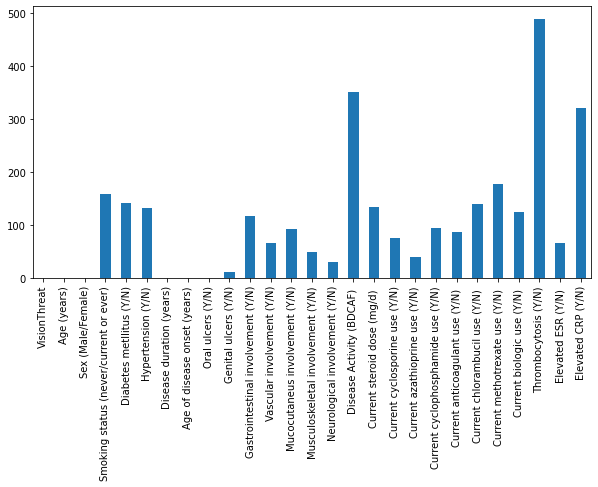

In [15]:
# plot them 
matplotlib.rcParams['figure.figsize'] = (10,5)
data.isnull().sum().plot(kind="bar")

> **At the request of the expert, the missing values will be replaced with the value (-999).**

In [16]:
# the replacement
data=data.replace(np.nan , -999)

In [17]:
# Check the missing exist or not
data.isnull().sum().any()

False

In [18]:
#data_0= data[data['Sex (Male/Female)'] == 1]
#data_0=data_0.drop('Sex (Male/Female)', axis=1)
#data=data_0.copy()

**Now let's look at the internal data on some of the columns in terms of the distribution between the categories.**

<AxesSubplot:>

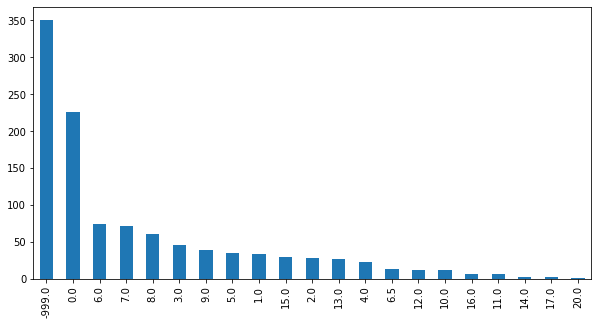

In [19]:
data["Disease Activity (BDCAF) "].value_counts().plot(kind="bar")

<AxesSubplot:>

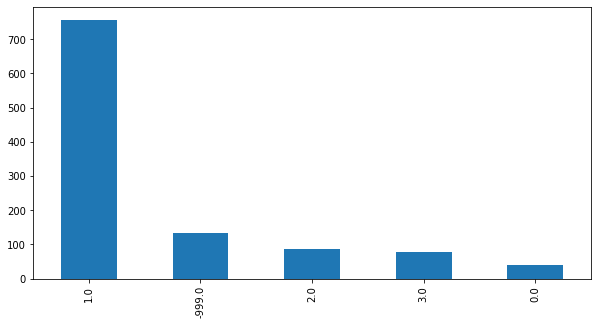

In [20]:
data["Current steroid dose (mg/d) "].value_counts().plot(kind="bar")

> **These are the highest values spread over the categories of data, and they are separate values or as they are called discontinuous values.**

## 6.0 Prepare data for training

### 6.1 Initially separate the data

> **Here we will separate the features from the goal column, after which each part will follow its own processing journey.**

In [21]:
# Here we perform an initial separation of the data, specifically the target column from the rest of the columns.
target=data["VisionThreat"]
features=data.drop(["VisionThreat"],axis=1)

### 6.2 Actual splitting of data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [23]:
# split the data without encoding or scale the data for purposes
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(features,target,test_size=0.2,random_state=0)

In [24]:
# Here I made a transformation of the target column.
object_1=LabelEncoder()
y=object_1.fit_transform(target)

In [25]:
# Here I do a conversion of categorical columns from the data
object_1=LabelEncoder()
# During the conversion process, we used the first projection.
for i in features.select_dtypes(exclude=[np.number]).columns:
    features[i] = object_1.fit_transform(data[i])

In [26]:
# scale the features
scaler = MinMaxScaler()
scaler.fit(features)

MinMaxScaler()

In [27]:
new_features = scaler.transform(features)

# the results
new_features

array([[0.5  , 0.   , 0.   , ..., 0.999, 0.999, 0.   ],
       [0.   , 0.   , 0.999, ..., 0.999, 1.   , 0.   ],
       [0.   , 1.   , 0.999, ..., 0.999, 0.999, 1.   ],
       ...,
       [0.5  , 1.   , 1.   , ..., 0.   , 0.   , 0.   ],
       [0.5  , 1.   , 0.999, ..., 0.   , 0.   , 0.   ],
       [1.   , 0.   , 0.999, ..., 0.   , 0.   , 0.   ]])

In [28]:
# split the data with encoding and data scaling which actually I will use 
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=0)

In [29]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(875, 26) (219, 26) (875,) (219,)


## 7.0 Random Forest Model

In [30]:
# the module
from sklearn.ensemble import RandomForestClassifier
# to optimizeing or tuning the parameters
from sklearn.model_selection import GridSearchCV

# for accuracy
from sklearn.metrics import accuracy_score

In [31]:
RandomForestClassifierModel=RandomForestClassifier()

parameters = {
    "n_estimators":[50,70,100,150,200],
    "max_depth":[7,11,13,15,32,None]
    
}

In [32]:
#  I will pass the classifier and parameters and the number of iteration in the GridSearchCV method.
cv = GridSearchCV(RandomForestClassifierModel,parameters,cv=5)
cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 11, 13, 15, 32, None],
                         'n_estimators': [50, 70, 100, 150, 200]})

In [33]:
#I have defined the method for printing all the iteration done and scores in each iteration.
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

display(cv)

Best parameters are: {'max_depth': 13, 'n_estimators': 150}


0.754 + or -0.027 for the {'max_depth': 7, 'n_estimators': 50}
0.753 + or -0.033 for the {'max_depth': 7, 'n_estimators': 70}
0.755 + or -0.031 for the {'max_depth': 7, 'n_estimators': 100}
0.761 + or -0.031 for the {'max_depth': 7, 'n_estimators': 150}
0.755 + or -0.028 for the {'max_depth': 7, 'n_estimators': 200}
0.786 + or -0.016 for the {'max_depth': 11, 'n_estimators': 50}
0.786 + or -0.029 for the {'max_depth': 11, 'n_estimators': 70}
0.795 + or -0.023 for the {'max_depth': 11, 'n_estimators': 100}
0.795 + or -0.026 for the {'max_depth': 11, 'n_estimators': 150}
0.795 + or -0.01 for the {'max_depth': 11, 'n_estimators': 200}
0.784 + or -0.017 for the {'max_depth': 13, 'n_estimators': 50}
0.787 + or -0.017 for the {'max_depth': 13, 'n_estimators': 70}
0.789 + or -0.031 for the {'max_depth': 13, 'n_estimators': 100}
0.802 + or -0.019 for the {'max_depth': 13, 'n_estimators': 150}
0.795 + or -0.017 for the {'max_depth': 

In [34]:
# building the model
RandomForestClassifierModel=RandomForestClassifier(max_depth = None, n_estimators = 200, random_state = 44)

# fit or train the model
RandomForestClassifierModel.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=44)

In [35]:
#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(x_train, y_train))
# And now we will see the accuracy of the model in the test data.
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(x_test, y_test))

RandomForestClassifierModel Train Score is :  0.992
RandomForestClassifierModel Test Score is :  0.8356164383561644


In [36]:
pred_RF = RandomForestClassifierModel.predict(x_test)
acc=accuracy_score(y_test, pred_RF)
print(f"The accuracy score of Random Forest Model = {round(acc, 3)}")

The accuracy score of Random Forest Model = 0.836


### 7.1 Make sure the results are accurate

In [37]:
# prepare the cross-validation procedure
cv = KFold(n_splits=2, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(RandomForestClassifierModel, features, target, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.809 (0.008)


In [38]:
print('Accuracy: %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Accuracy: 0.817 (0.008)


## 7.2 Confusion Matrix for Random Forest

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,pred_RF)
confusion_matrix

array([[95, 16],
       [20, 88]])

## 7.3 Sensitivity and Specificity

In [40]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', round(sensitivity, 3))

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', round(specificity, 3))

Sensitivity :  0.826
Specificity :  0.846


## 7.4 PPV and NPV

In [41]:
total=sum(sum(confusion_matrix))

ppv = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('ppv : ', round(ppv, 3))

npv = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('npv : ', round(npv, 3))

ppv :  0.856
npv :  0.815


## 8.0 XGBClassifier Model

In [42]:
# import he module
from xgboost.sklearn import XGBClassifier

In [43]:
# build the model
clf=XGBClassifier(max_depth=9, learning_rate=0.01, n_estimators=1000, objective='binary:logistic', booster='gbtree')

#Printing all the parameters of XGBoost
print(clf)
 
# Train the model
XGB=clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=9,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
[18:12:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
#Calculating Details
print('XGB Train Score is : ' , XGB.score(x_train, y_train))
print('XGB Test Score is : ' , XGB.score(x_test, y_test))

XGB Train Score is :  0.9828571428571429
XGB Test Score is :  0.863013698630137


In [45]:
# test accuracy
y_pred = XGB.predict(x_test)
acc=accuracy_score(y_test, y_pred)
print(f"The accuracy score of XGBClassifier Model = {round(acc, 3)}")

The accuracy score of XGBClassifier Model = 0.863


### 8.1 Make sure the results are accurate

In [58]:
num_split = [2,3,4,5,6,7,8,9,10]

for i in num_split:
    cv = KFold(n_splits=i, random_state=1, shuffle=True)
    #build the model
    clf=XGBClassifier(max_depth=9, learning_rate=0.01, n_estimators=1000, objective='binary:logistic', booster='gbtree')
    #use k-fold CV to evaluate model
    scores= cross_val_score(clf, features,target, scoring='accuracy',cv=cv, n_jobs=-1)
    print(f'Accuracy for n_splits {i}:  %.3f (%.3f)' % (np.mean(scores), np.std(scores)));

Accuracy for n_splits 2:  0.781 (0.004)
Accuracy for n_splits 3:  0.792 (0.016)
Accuracy for n_splits 4:  0.802 (0.018)
Accuracy for n_splits 5:  0.810 (0.014)
Accuracy for n_splits 6:  0.797 (0.009)
Accuracy for n_splits 7:  0.797 (0.007)
Accuracy for n_splits 8:  0.796 (0.024)
Accuracy for n_splits 9:  0.806 (0.042)
Accuracy for n_splits 10:  0.812 (0.033)


In [47]:
print('Accuracy with max(): %.3f (%.3f)' % (np.max(scores), np.std(scores)))

Accuracy with max(): 0.873 (0.033)


In [48]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix #for model evaluation
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[96, 15],
       [15, 93]])

In [49]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', round(sensitivity, 3))

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', round(specificity, 3))

Sensitivity :  0.865
Specificity :  0.861


## 9.0 Interpretation of results using shape

> **Many algorithms have been built but I will only interpret the results for the XGBClassifier for now.**

In [50]:
# importing
import shap

In [51]:
row_to_show = len(x_test_1.columns)
data_for_prediction = features.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


predict=XGB.predict_proba(data_for_prediction_array)

In [52]:
explainer = shap.Explainer(XGB, x_test, feature_names = x_test_1.columns)
shap_values = explainer(x_test_1)

 99%|===================| 217/219 [00:13<00:00]        

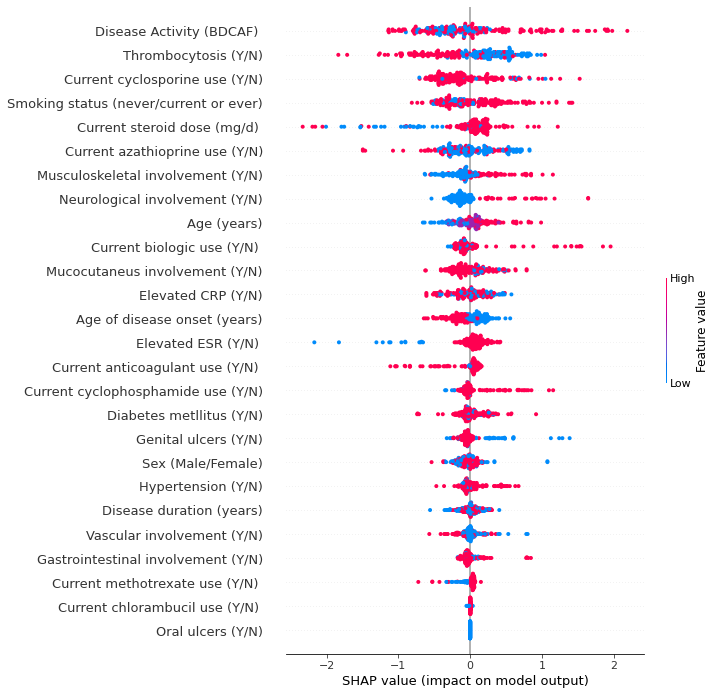

In [53]:
shap.plots.beeswarm(shap_values,max_display=26)

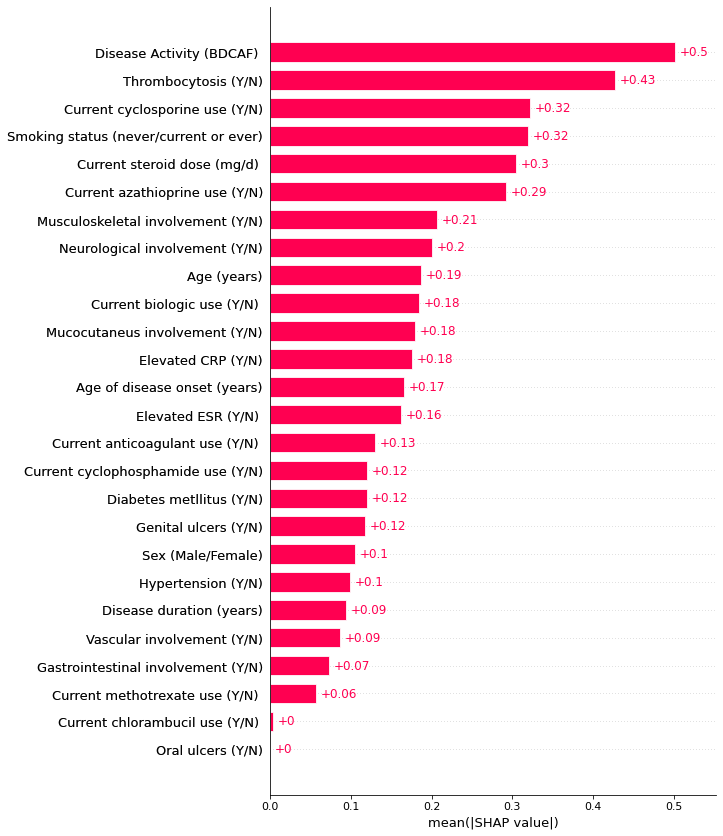

In [54]:
shap.plots.bar(shap_values,max_display=len(x_test_1))

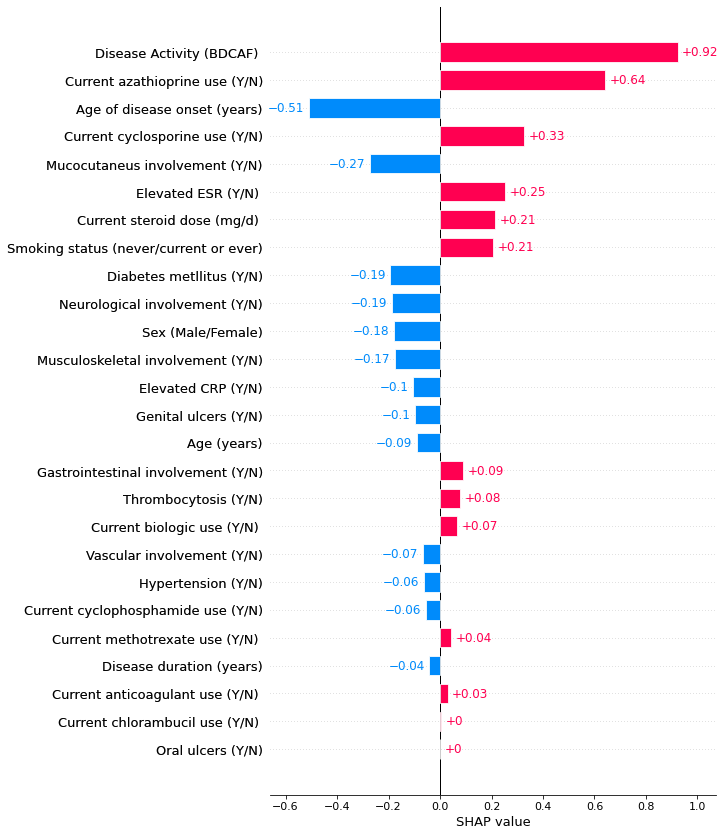

In [55]:
shap.plots.bar(shap_values[-1], max_display=len(x_test_1))

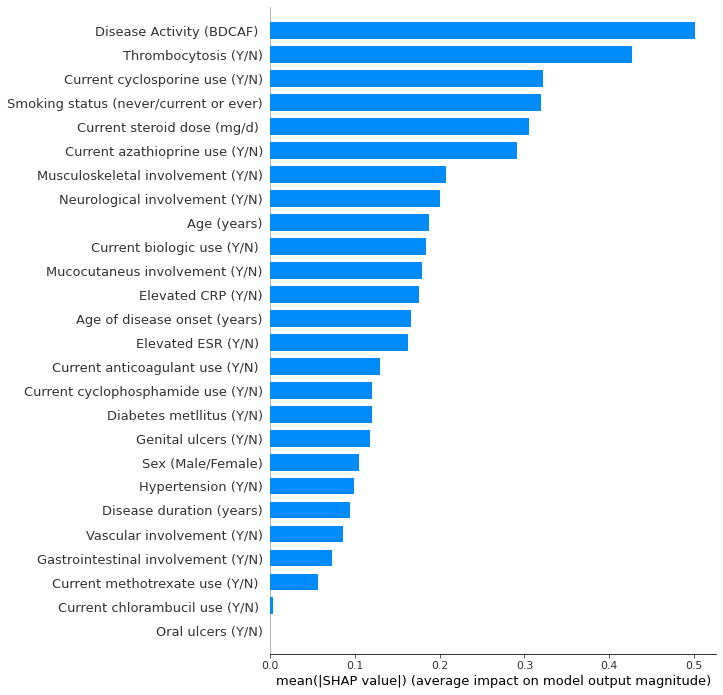

In [57]:
shap.summary_plot(shap_values, x_test_1, plot_type="bar",max_display=26);

**I will stop here now and continue in another file with the same characteristics.**